04_training_linear_models

# 前言

## 线性回归模型 -- 两种不同的训练模型的方法

- 通过 ‘闭式’方程 -- 直接计算出<span style="color: red">最合适训练集的模型参数</span>（也就是使训练集上的成本函数最小化的模型参数）
- 使用迭代优化的方法，即梯度下降（GD : gradient descent）

## 多项式回归的讨论

- 模型复杂，更适合非线性数据集
- 该模型参数比线性模型更多，更容易造成对训练数据过度拟合
- 学习曲线 -- 分辨是否过度拟合
- 正则化 -- 降低过度拟合训练数据的风险

## 学习两种经常使用的分类任务模型

- Logistic 回归
- Softmax 回归



# 线性回归

- 线性模型：对输入特征(x_i)加权(sigma_i)求和，再加上偏值项（sigma_0）
- 回归模型最常见的性能指标： 均方根误差（RMSE）

## 标准方程

成本函数最小的 sigma 值---闭式解方法

In [51]:
import numpy as np

num = 100

np.random.seed(42)
# rand()  # Random values in a given shape [0, 1)
X = 2 * np.random.rand(num, 1)
# 生成 标准正态分布 N(μ,σ2)  (平均值， 方差)
# mu + sigma * np.random.randn(...)
y = 4 + 3 * X + np.random.randn(num, 1)

In [207]:
# 均值， 方差， 标准差
np.mean(y), np.var(y), np.std(y)

(6.820004100101897, 3.4958477182304035, 1.869718620068379)

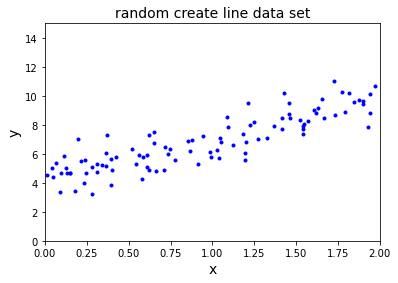

In [66]:
import matplotlib.pyplot as plt
import matplotlib

plt.plot(X, y, "b.")
# plt.scatter(X, y)
plt.title("random create line data set", fontsize=14)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [87]:
X_b = np.c_[np.ones((num, 1)), X]  # # add x0 = 1 to each instace
# 使用线性模块（np.linalg）中的 inv() 函数来对矩阵求逆，dot() 方法来计算矩阵的内积
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [89]:
# 计算获得的最小成本函数的 sigma 值，
# sigma0=4.21509616(截距)   sigma1=2.77011339（特征权重）
theta_best

array([[4.21509616],
       [2.77011339]])

In [91]:
# pinv() 伪逆
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

使用 sigma 做出预测

In [76]:
X_new = np.array([[0], [2]])
# add x0 = 1 to each instace
# add x0 的目的是在 矩阵相乘时，x0 所对应的是sigma0（偏置项）（截距）
X_new_b = np.c_[np.ones((2, 1)), X_new]
# X_new_b 与 theta_best 的点积
y_predict = X_new_b.dot(theta_best)
# x=0时y=4.21509616    x=2时y=4.21509616
y_predict

array([[4.21509616],
       [9.75532293]])

In [79]:
"""
[ 1 0    [4.21509616
  1 2]    2.77011339]
两个矩阵相乘 
"""
# y = mu + sigma * np.random.randn(...)
y1 = 1 * 4.21509616 + 0 * 2.77011339
y2 = 1 * 4.21509616 + 2 * 2.77011339 

y1, y2

(4.21509616, 9.75532294)

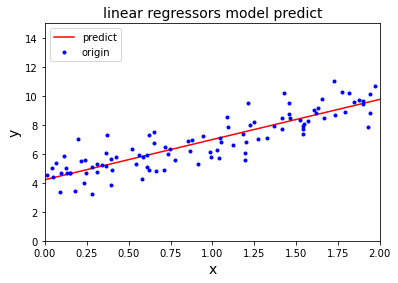

In [74]:
# 绘制模型的预测结果
plt.plot(X_new, y_predict, "r-", label="predict")
plt.plot(X, y, "b.", label="origin")
plt.axis([0, 2, 0, 15])
plt.title("linear regressors model predict", fontsize=14)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend(loc="upper left")

plt.show()

In [70]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [72]:
# 偏值项， 特征权重
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [73]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

## 计算复杂度

# 梯度下降

- 更适合特征数或训练实例数量大到内存无法满足要求的场景
- 梯度下降是一种比较通用的**优化算法**，能够为大范围的问题找到最优解。
- 梯度下降的中心思想：迭代地调整参数从而使成本函数最小化。
- <span style="color: red">注意：</span> 应用梯度下降时，需要保证所有特征值的大小比例都差不多（如：`StandardScarler`类），否则收敛的时间会很长。
- **原理：** 要实现梯度下降，需要计算每个模型关于参数${\theta_j}$的成本函数梯度。换言之，需要计算的是如果改变${\theta_j}$，成本函数会改变多少，-- *偏导数*。

## 批量梯度下降

- 公式4-6（P_110）：成本函数的梯度向量： 每一步都使用整批训练数据--*批量梯度下降*
- **缺点：** 训练集很大时， 算法会特别的慢


In [135]:
# 学习率
eta = 0.1
n_iterations = 1000
# 所使用的数据集中实例的数量
m = 100
# 随机初始化
theta = np.random.randn(2, 1)
# theta 

for iteration in range(n_iterations):
    # 成本函数的梯度向量
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
#     print(gradients)
    # 梯度下降步长
    theta = theta - eta * gradients

In [136]:
theta

array([[4.21509616],
       [2.77011339]])

In [168]:
def plot_gradient_descent(theta, eta):
    """绘制梯度下降使用不同的学习率"""
    plt.plot(X, y, "b.")
    
    m = len(X_b)
    n_iterations = 1000
    
    for interation in range(n_iterations):
        if interation < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if interation > 0 else "b--"
            # interation = 0时为起点
            plt.plot(X_new, y_predict, style)
        # 成本函数的梯度向量
        gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
        # 梯度下降步长
        theta = theta - eta * gradients 
        theta_path_bgd.append(theta)
        
    plt.xlabel("$x_1$", fontsize=14)
    plt.title("$\eta={}$".format(eta), fontsize=18)
    plt.axis([0, 2, 0, 15])


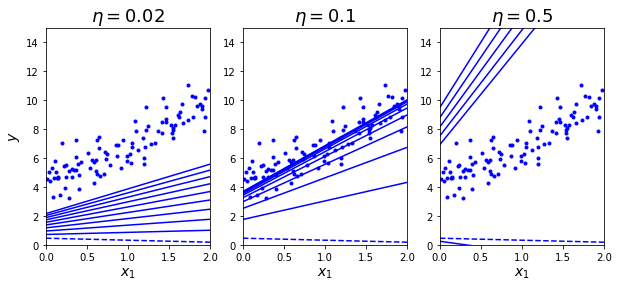

In [169]:
theta_path_bgd = []
np.random.seed(42)
theta = np.random.randn(2, 1)

plt.figure(figsize=(10, 4))
plt.subplot(131)
plt.ylabel("$y$", fontsize=14)
plot_gradient_descent(theta, 0.02)
plt.subplot(132)
plot_gradient_descent(theta, 0.1)
plt.subplot(133)
plot_gradient_descent(theta, 0.5)

## 随机梯度下降

- 随机梯度下降： 每一步在训练集中随机选择一个实例，并且基于该单个实例来计算梯度。-- 算法快了
- 随机性的**优点**：可以逃离局部最优。**缺点：** 永远定位不出最小值（在最小值处持续反弹，不会停止），-- 应对之策： 逐步降低学习率


In [143]:
np.random.randint(10)

2

(0.0, 2.0, 0.0, 15.0)

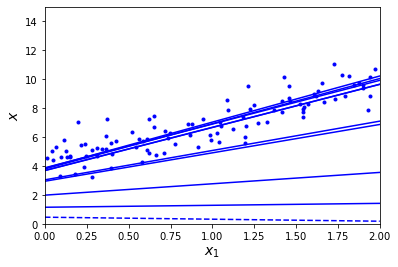

In [170]:
np.random.seed(42)
theta_path_sgd = []
# 迭代次数
n_epochs = 50
# 学习计划超参数
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "b--"
            plt.plot(X_new, y_predict, style)
        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        # i 变大，t 变大， eta 变小
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)
 
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x$", fontsize=14)
plt.axis([0, 2, 0, 15])

In [171]:
theta

array([[4.21076011],
       [2.74856079]])

In [172]:
from sklearn.linear_model import SGDRegressor

# Linear model fitted by minimizing a regularized empirical loss with SGD
# 最大迭代次数，，不使用正则化，学习率从0.1开始
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None, random_state=42, tol=-inf)

In [167]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.16782089]), array([2.72603052]))

## 小批量梯度下降

In [186]:
theta_path_mgd = []
np.random.seed(42)

n_iterations = 50
minibatch_size = 20
t0, t1 = 200, 1000

theta = np.random.randn(2,1)

def learning_schedule_m(t):
    return t0 / (t + t1)

t = 0 
for epoch in range(n_iterations):
    index_shuffled = np.random.permutation(m)
    X_b_shuffled = X_b[index_shuffled]
    y_shuffled = y[index_shuffled]
    
    for i in range(0, m, minibatch_size):
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]

        t += 1
        eta = learning_schedule_m(t)

        gradients = 2 / minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [187]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [189]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

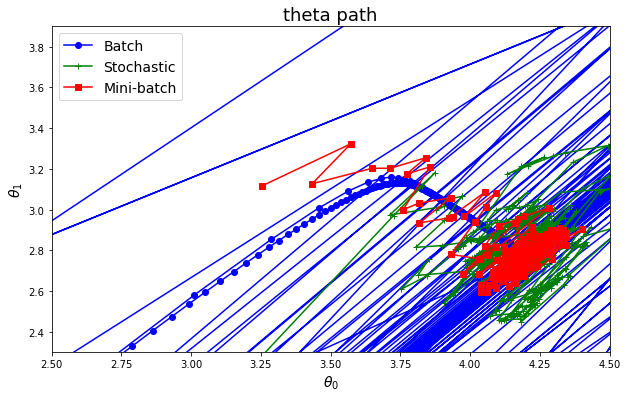

In [205]:
plt.figure(figsize=(10, 6))
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", label="Batch")
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "g-+", label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "r-s", label="Mini-batch")

plt.legend(loc = "upper left", fontsize=14)
plt.xlabel(r"$\theta_0$", fontsize=14)
plt.ylabel(r"$\theta_1$", fontsize=14)
plt.title("theta path", fontsize=18)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()


# 多项式回归

- 多项式回归：将每个特征的幂次方添加为一个新的特征，然后在这个扩展过训练集上训练线性模型。即使用 线性模型来拟合 非新型数据。




In [225]:
# y = o.5 * x**2 + 1.0 * x + 2 + 高斯白噪声
m = 100
np.random.seed(42)
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) 

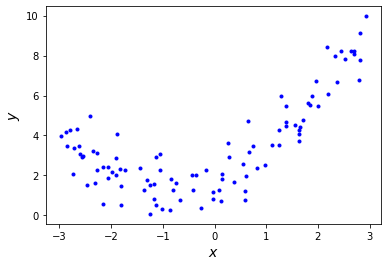

In [226]:
plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
# plt.title("非线性带噪声数据集")
plt.show()


使用`PolynomialFeatures`类对训练数据进行转换：将每个特征的平方（二次多项式）作为新特征加入训练集

In [678]:
from sklearn.preprocessing import PolynomialFeatures

# PolynomialFeatures
poly_feattures = PolynomialFeatures(degree=2, include_bias=False)
# 包含原本的特征 X 和该特征的平方
X_poly = poly_feattures.fit_transform(X)

In [679]:
poly_feattures

PolynomialFeatures(include_bias=False)

In [251]:
X[0], X_poly[0]

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [252]:
0.75275929 ** 2

0.566646548681304

In [253]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
# 截距，系数
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

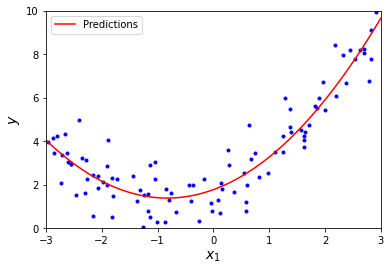

In [254]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_polt = poly_feattures.fit_transform(X_new)
y_new = lin_reg.predict(X_new_polt)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", label="Predictions")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.show()

# 学习曲线

**在不知道生成数据的函数是什么的情况下：该如何确定模型的复杂程度？ 该如何判断模型是过度拟合还是拟合不足？**
- 使用交叉验证来评估模型的泛化性能：如果模型在训练集上表现良好，但是在交叉验证上表现的非常的糟糕---模型是过度拟合。 如果二者的表现都不佳---模型是拟合不足。
- 观察学习曲线：曲线绘制的是模型在训练集和验证集上，关于“训练集大小”的性能指标。 


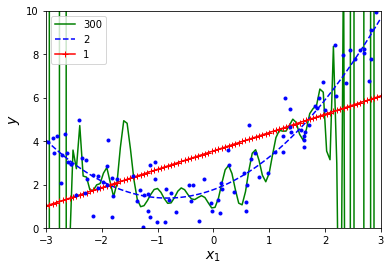

In [259]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, degree, linewidth in (("g-", 300, 2), ("b--", 2, 3), ("r-+", 1, 1)):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    lin_reg = LinearRegression()
    std_scaler = StandardScaler()
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg)
    ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    
    plt.plot(X_new, y_newbig, style, label=str(degree))
    
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.legend(loc="upper left", fontsize=10)
plt.axis([-3, 3, 0, 10])
plt.show()

In [283]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    """绘制学习曲线：模型在训练集和验证集上，关于‘训练集大小’的性能函数"""
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        # Mean squared error regression loss
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")  
    plt.legend(loc="upper right", fontsize=12)
    plt.xlabel("train set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)
    plt.axis([0, 80, 0, 3])
    plt.title("learning curves", fontsize=18)
    plt.show()

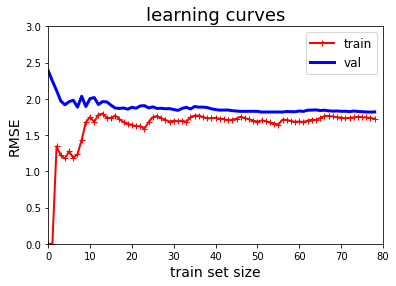

In [284]:
# 纯线性回归模型的学习曲线
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

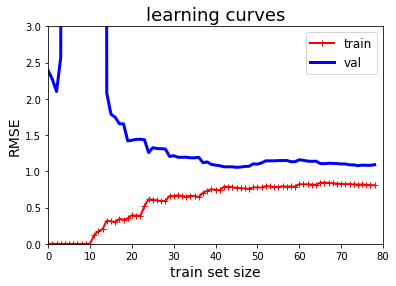

In [285]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("sgd_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

# 正则线性模型

减少过度拟合方法之一：对模型正则化。       
改进模型过度拟合方法之一：提供更多训练数据。

对<span style="color:#F00">线性模型</span>来说：正则化通常通过约束模型的<span style="color:#F00">权重</span>来实现。接下来将使用*岭回归*(`Ridge Regression`)、*套索回归*(`Lasso Regression`)、*弹性网络*(`Elastic Net`) 这三种不同的方法对<span style="color:#F00">权重进行约束</span>。

## 岭回归（Ridge Regression）

- 岭回归：向成本函数中添加一个正则项--- l2范数平方的一半
- **注意：** 在进行岭回归之前，必须对数据进行缩放（StandardScaler类），因为它对输入的特征大小非常的敏感。大多数正则化模型都是如此。

In [324]:
# 初始化数据
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    """使用不同的 alphas 值对某个线性数据进行训练的几种模型"""
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                # 对数据进行扩展
                ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                # 进行缩放
                ("std_scaler", StandardScaler()),
                # 将岭回归模型用于结果特征
                ("regul_mode", model)
            ])
        model.fit(X, y)
        y_predict_regul = model.predict(X_new)
        
        plt.plot(X_new, y_predict_regul, style, label=r"$\alpha={}$".format(alpha))
            
    plt.plot(X, y, "b.")
    plt.xlabel("$x_1$", fontsize=14)
    plt.axis([0, 3, 0, 4])
    plt.legend(loc="upper left", fontsize=12)


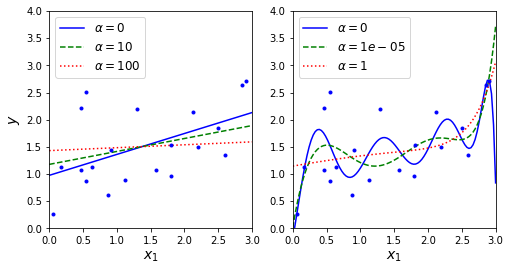

In [339]:
from sklearn.linear_model import Ridge

plt.figure(figsize=(8, 4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", fontsize=14)

plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)


In [326]:
# 闭试解的岭回归
# colver="cholesky" 利用 cholesky 的矩阵因式分解法
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [327]:
# 随机梯度下降
# penalty="l2" 使用正则项的类型， l2 范数
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.46543286])

## 套索回归

- Lasso回归：像成本函数中添加一个正则项---权重向量l1范数
- **特点：** 它倾向于完全消除最不重要特征的权重（即将它们设置为0）


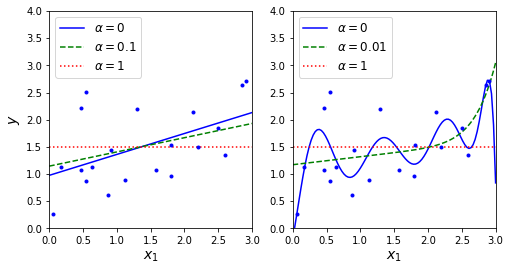

In [353]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8, 4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", fontsize=14)

plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-2, 1), random_state=42)


In [340]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [355]:
sgd_reg = SGDRegressor(penalty="l1")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.46810381])

## 弹性网络

- 弹性网络：其正则项是岭回归和Lasso回归的正则项的混合，混合的比例通过 r来控制。


In [356]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## 早期停止法

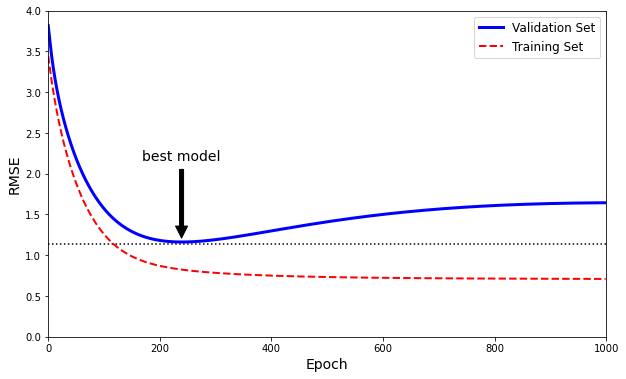

In [449]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m ,1) 

# 训练集和验证集 
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)
# 模型
sgd_reg = SGDRegressor(max_iter=1,
                      tol=-np.infty,  # 解决收敛警告问题
                      warm_start=True,  # 调用 fit() 方法，会从停止的地方继续开始训练，而不会重新开始
                      penalty=None,  # 不使用任何正则化
                      learning_rate="constant",
                      eta0=0.0005,
                      random_state=42)

# 缩放
poly_scaler = Pipeline([
    ("poly_feature", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)
# X_val_poly_scaled = poly_scaler.fit_transform(X_val)

n_epochs = 1000
train_errors, val_errors = [], []

for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    
    train_errors.append(mean_squared_error(y_train_predict, y_train))
    val_errors.append(mean_squared_error(y_val_predict, y_val))

# 验证误差最小值点
best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

# 绘图
plt.figure(figsize=(10, 6))
# 最佳模型点-注释
plt.annotate("best model",
            xy=(best_epoch, best_val_rmse),  # 注释点
            xytext=(best_epoch, best_val_rmse + 1),  # 注释词位置
            ha="center",  # 箭头对准注释词中间
            arrowprops=dict(facecolor="black", shrink=0.05),  # 箭头
            fontsize=14)

best_val_rmse -= 0.03  # 切点更清晰
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:")
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation Set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training Set")
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.axis([0, n_epochs, 0, 4])
plt.show()


In [450]:
best_epoch, best_val_rmse

(239, 1.1324590535779686)

In [451]:
from sklearn.base import clone

sgd_reg = SGDRegressor(max_iter=1,
                      tol=-np.infty,
                      warm_start=True,
                      penalty=None,
                      learning_rate="constant",
                      eta0=0.0005,
                      random_state=42)
min_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    
    if val_error < min_val_error:
        # 获取最小值
        min_val_error = val_error
        best_epoch = epoch
        # 获取最小值（val_error）得模型
        best_model = clone(sgd_reg)

In [452]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

### Lasso回归与岭回归 ？？？

In [453]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

# ignoring bias term
t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)  # Return coordinate matrices from coordinate vectors.
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[-1, 1], [-0.3, -1], [1, 0.1]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

In [454]:
nx, ny = (3, 3)
xt = np.linspace(0, 1, nx)
yt = np.linspace(1, 2, ny)
xv, yv = np.meshgrid(xt, yt)


In [455]:
# xt, yt
# xv.ravel(), yv.ravel()
xv, yv

(array([[0. , 0.5, 1. ],
        [0. , 0.5, 1. ],
        [0. , 0.5, 1. ]]),
 array([[1. , 1. , 1. ],
        [1.5, 1.5, 1.5],
        [2. , 2. , 2. ]]))

In [456]:
# xv, yv, xv.ravel()
np.c_[xv.ravel(), yv.ravel()]

array([[0. , 1. ],
       [0.5, 1. ],
       [1. , 1. ],
       [0. , 1.5],
       [0.5, 1.5],
       [1. , 1.5],
       [0. , 2. ],
       [0.5, 2. ],
       [1. , 2. ]])

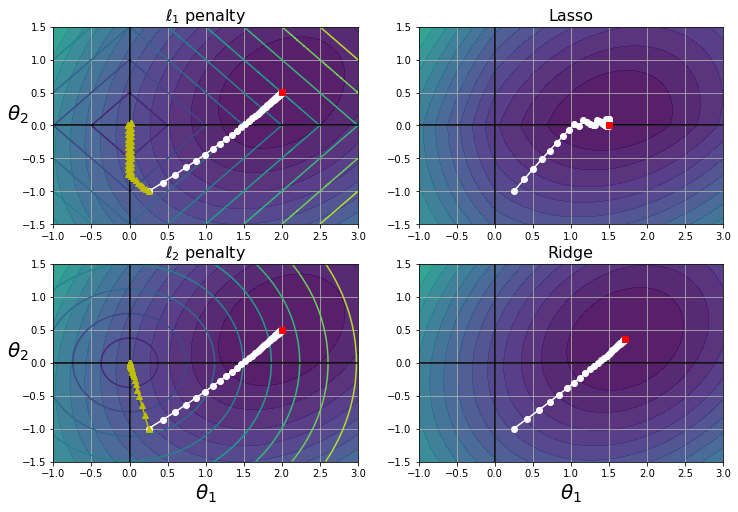

In [457]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.1, n_iterations = 50):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + 2 * l2 * theta

        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

plt.figure(figsize=(12, 8))
for i, N, l1, l2, title in ((0, N1, 0.5, 0, "Lasso"), (1, N2, 0,  0.1, "Ridge")):
    JR = J + l1 * N1 + l2 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(t_init, Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    plt.subplot(221 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, J, levels=levelsJ, alpha=0.9)
    plt.contour(t1, t2, N, levels=levelsN)
    plt.plot(path_J[:, 0], path_J[:, 1], "w-o")
    plt.plot(path_N[:, 0], path_N[:, 1], "y-^")
    plt.plot(t1_min, t2_min, "rs")
    plt.title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        plt.xlabel(r"$\theta_1$", fontsize=20)
    plt.ylabel(r"$\theta_2$", fontsize=20, rotation=0)

    plt.subplot(222 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    plt.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    plt.plot(t1r_min, t2r_min, "rs")
    plt.title(title, fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        plt.xlabel(r"$\theta_1$", fontsize=20)

plt.show()

## 逻辑回归

## 概率估算

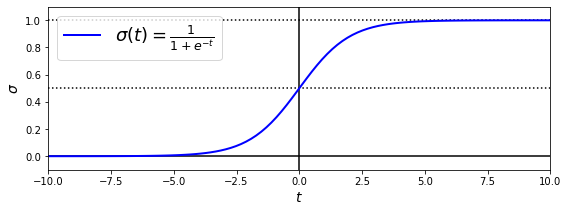

In [469]:
# 逻辑函数
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-0.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("$t$", fontsize=14)
plt.ylabel("$\sigma$", fontsize=14)
plt.legend(loc="upper left", fontsize=18)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

## 训练和成本函数

## 决策边界

基于花瓣宽度这一特征，创建一个分类器来检测 `Virginica`鸢尾花

In [482]:
from sklearn import datasets

# 加载数据
iris = datasets.load_iris()
list(iris.keys())
# iris

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [484]:
X = iris["data"][:, 3:]  #第四列数据  petal width（花瓣宽度）
y = (iris["target"] == 2).astype(np.int)  # 1 if iris-Virginica else 0

In [485]:
from sklearn.linear_model import LogisticRegression

# 训练逻辑回归模型
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

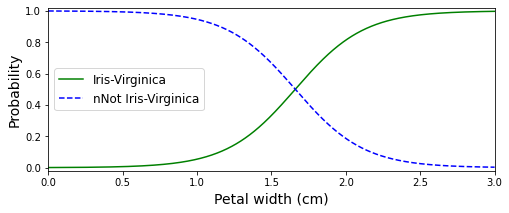

In [501]:
# 花瓣宽度在0-3cm 之间的鸢尾花，模型估算出的概率
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # 多少行不知道（-1），反正就一列（1）
y_proba = log_reg.predict_proba(X_new)

# 绘图
plt.figure(figsize=(8, 3))
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="nNot Iris-Virginica")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=12)
plt.axis([0, 3, -0.02, 1.02])
plt.show()


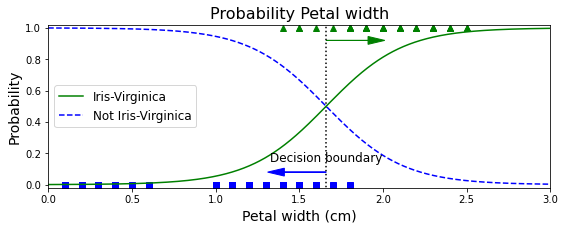

In [568]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # 多少行不知道（-1），反正就一列（1）
y_proba = log_reg.predict_proba(X_new)
# 决策边界：是 和 不是 的可能性都是 50%，
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

# 绘图
plt.figure(figsize=(9, 3))
# Not Iris-Virginica
plt.plot(X[y==0], y[y==0], "bs")
# Iris-Virginica
plt.plot(X[y==1], y[y==1], "g^")
# 决策边界 1.6
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:")
plt.text(decision_boundary, 0.15, "Decision boundary", fontsize=12, color="k", ha="center")
plt.arrow(float(decision_boundary), 0.08, -0.25, 0, head_width=0.05, head_length=0.1, color="b")
plt.arrow(float(decision_boundary), 0.92, 0.25, 0, head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=12)
plt.title("Probability Petal width", fontsize=16)
plt.axis([0, 3, -0.02, 1.02])
plt.show()


In [570]:
decision_boundary

array([1.66066066])

In [569]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

显示两个特征：花瓣宽度和花瓣长度

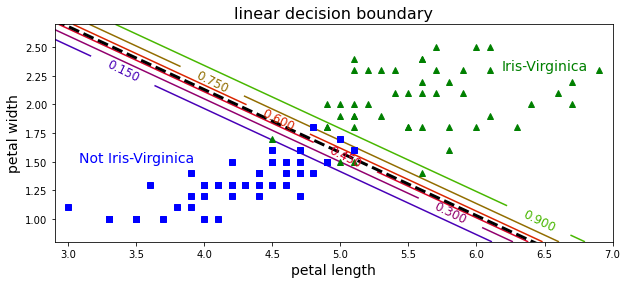

In [659]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # 花瓣长度（列）， 花瓣宽度（列）
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X, y)

# 初始化预测数据
x_pw = np.linspace(2.9, 7, 500).reshape(-1, 1)  # x_petal_width
y_pl = np.linspace(0.8, 2.7, 200).reshape(-1, 1)  # y_petal_length
# 500 相当于 x轴上的点数，200相当于 y轴上的点数。二者合并形成 500 * 200 的网格
# x0（x1） 相当于所有点的 x(y)轴左边（200（行y） * 500（列x））
x0, x1 = np.meshgrid(x_pw, y_pl)
# [pw, pl]
X_new = np.c_[x0.ravel(), x1.ravel()]
# 预测
y_proba = log_reg.predict_proba(X_new)

# 绘图
plt.figure(figsize=(10, 4))
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
plt.plot(X[y==0, 0], X[y==0, 1], "bs")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
 

plt.clabel(contour, inline=1, fontsize=12)  # Label a contour plot.
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")

plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.title("linear decision boundary", fontsize=16)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

In [586]:
x_pw11 = np.linspace(1, 2, 4).reshape(-1, 1)  # x_petal_width
x_pl11 = np.linspace(0, 1, 3).reshape(-1, 1)  # x_petal_length
x011, x111 = np.meshgrid(x_pw11, x_pl11)

In [591]:
 x_pw11, x_pl11,

(array([[1.        ],
        [1.33333333],
        [1.66666667],
        [2.        ]]),
 array([[0. ],
        [0.5],
        [1. ]]))

In [590]:
x011, x111, x111.ravel()

(array([[1.        , 1.33333333, 1.66666667, 2.        ],
        [1.        , 1.33333333, 1.66666667, 2.        ],
        [1.        , 1.33333333, 1.66666667, 2.        ]]),
 array([[0. , 0. , 0. , 0. ],
        [0.5, 0.5, 0.5, 0.5],
        [1. , 1. , 1. , 1. ]]),
 array([0. , 0. , 0. , 0. , 0.5, 0.5, 0.5, 0.5, 1. , 1. , 1. , 1. ]))

In [595]:
np.c_[x0.ravel(), x1.ravel()]

array([[2.9  , 0.8  ],
       [3.925, 0.8  ],
       [4.95 , 0.8  ],
       [5.975, 0.8  ],
       [7.   , 0.8  ],
       [2.9  , 2.7  ],
       [3.925, 2.7  ],
       [4.95 , 2.7  ],
       [5.975, 2.7  ],
       [7.   , 2.7  ]])

In [604]:
y_proba

array([[9.99999998e-01, 1.65140362e-09],
       [9.99999998e-01, 1.73133642e-09],
       [9.99999998e-01, 1.81513821e-09],
       ...,
       [9.14530673e-11, 1.00000000e+00],
       [8.72308892e-11, 1.00000000e+00],
       [8.32036662e-11, 1.00000000e+00]])

In [614]:
log_reg.coef_

array([[ 5.75286199, 10.44454566]])

In [621]:
zz, len(zz), zz.shape

(array([[1.65140362e-09, 1.73133642e-09, 1.81513821e-09, ...,
         9.63404846e-01, 9.65035307e-01, 9.66595643e-01],
        [1.82457557e-09, 1.91289041e-09, 2.00547994e-09, ...,
         9.66762680e-01, 9.68248466e-01, 9.69669918e-01],
        [2.01590694e-09, 2.11348278e-09, 2.21578157e-09, ...,
         9.69822062e-01, 9.71175165e-01, 9.72469320e-01],
        ...,
        [3.59750531e-01, 3.70708378e-01, 3.81800957e-01, ...,
         1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
        [3.83025700e-01, 3.94255937e-01, 4.05598980e-01, ...,
         1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
        [4.06849822e-01, 4.18304986e-01, 4.29848945e-01, ...,
         1.00000000e+00, 1.00000000e+00, 1.00000000e+00]]),
 200,
 (200, 500))

In [622]:
boundary

array([2.73609573, 0.47781328])

## Softmax回归

In [671]:
X = iris["data"][:, (2, 3)]
y = iris["target"]

# multi_class="multinomial"  Softmax 回归
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [672]:
# 花瓣长 5cm， 宽 2cm
softmax_reg.predict([[5, 2]])

array([2])

In [673]:
# 94.2% 的概率为 Virginica 鸢尾花
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

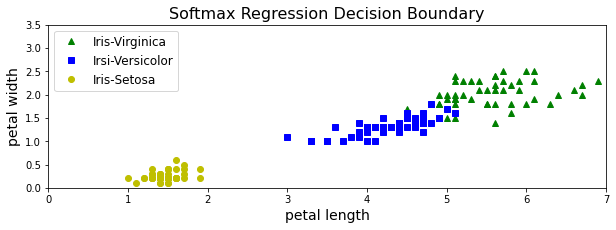

In [674]:
# 测试数据初始化
x_pl = np.linspace(0, 8, 500)
y_pw = np.linspace(0, 3.5, 200)
x0, x1 = np.meshgrid(x_pl, x_pw)
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

plt.figure(figsize=(10, 3))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Irsi-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.title("Softmax Regression Decision Boundary", fontsize=16)
plt.axis([0, 7, 0, 3.5])
plt.show()

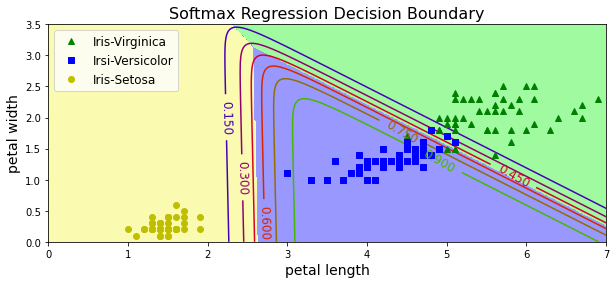

In [680]:
from matplotlib.colors import ListedColormap


# 测试数据初始化
x_pl = np.linspace(0, 8, 500).reshape(-1, 1)
y_pw = np.linspace(0, 3.5, 200).reshape(-1, 1)
x0, x1 = np.meshgrid(x_pl, y_pw)
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)
zz1 = y_proba[:, 1].reshape(x0.shape)  # 等高线的 z
zz = y_predict.reshape(x0.shape)  # 填充的分割区域  z


plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Irsi-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

# 填充
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)

# 等高线
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
# 等高线的标签
plt.clabel(contour, inline=1, fontsize=12)

plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.title("Softmax Regression Decision Boundary", fontsize=16)
plt.axis([0, 7, 0, 3.5])
plt.show()


# 练习